In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [12]:
output = pandas_profiling.ProfileReport(data)
output

In [7]:
# check missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

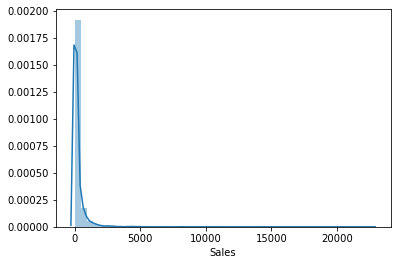

In [10]:
sns.distplot(data['Sales']);

In [13]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O']]

In [14]:
numeric_var_names

['Postal_Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [15]:
cat_var_names

['Ship_Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [16]:
data_num=data[numeric_var_names]
data_num.head(5)

,Postal_Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


In [17]:
data_cat=data[cat_var_names]
data_cat.head(5)

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [18]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Postal_Code,9994.0,0.0,5.515727e+08,55190.379428,56430.5000,32063.693350,1.028080e+09,0.580965,1040.000,2149.000000,10009.00000,10024.00000,23223.00000,56430.5000,90008.000,94122.00000,98006.000000,98115.000000,99301.000
Sales,9994.0,0.0,2.297201e+06,229.858001,54.4900,623.245101,3.884345e+05,2.711435,0.444,2.286000,4.98000,7.89720,17.28000,54.4900,209.940,572.70600,956.984245,2481.694600,22638.480
Quantity,9994.0,0.0,3.787300e+04,3.789574,3.0000,2.225110,4.951113e+00,0.587166,1.000,1.000000,1.00000,2.00000,2.00000,3.0000,5.000,7.00000,8.000000,11.000000,14.000
Discount,9994.0,0.0,1.561090e+03,0.156203,0.2000,0.206452,4.262242e-02,1.321693,0.000,0.000000,0.00000,0.00000,0.00000,0.2000,0.200,0.40000,0.700000,0.800000,0.800
Profit,9994.0,0.0,2.863970e+05,28.656896,8.6665,234.260108,5.487780e+04,8.174650,-6599.978,-319.264953,-53.03092,-15.47346,1.72875,8.6665,29.364,89.28162,168.470400,580.657882,8399.976


In [19]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data_num=data_num.apply(outlier_capping)

In [20]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [21]:
#for c_feature in categorical_features
for c_feature in ['Ship_Mode','Segment','Country','City','State','Region','Category','Sub-Category']:
    data_cat = create_dummies(data_cat,c_feature)
data_cat.head()

,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Segment_Corporate,Segment_Home Office,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
data_new = pd.concat([data_num, data_cat], axis=1)
data_new.head()

,Postal_Code,Sales,Quantity,Discount,Profit,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,41.913600,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42420,731.9400,3,0.00,219.582000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90036,14.6200,2,0.00,6.871400,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,33311,957.5775,5,0.45,-319.264953,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,33311,22.3680,2,0.20,2.516400,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# correlation matrix (ranges from 1 to -1)
corrm=data_new.corr()
corrm

,Postal_Code,Sales,Quantity,Discount,Profit,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
Postal_Code,1.000000,-0.018354,0.013164,0.058435,-0.043831,0.017518,0.006637,-0.009314,-0.014515,-0.001995,...,-0.013741,0.011344,-0.009930,-0.008916,0.000487,0.006278,-0.012790,-0.004971,0.003382,0.017789
Sales,-0.018354,1.000000,0.273515,-0.041280,0.549632,0.007120,0.009058,-0.009162,0.010276,0.007534,...,-0.059107,-0.073744,-0.093592,-0.086214,0.224597,-0.153543,0.120983,0.042029,-0.015288,0.195424
Quantity,0.013164,0.273515,1.000000,0.009169,0.148621,-0.018749,0.005400,0.015735,0.017440,-0.002001,...,-0.015404,0.027380,-0.009896,0.005081,0.002641,-0.001646,-0.013224,-0.007331,-0.023689,0.007993
Discount,0.058435,-0.041280,0.009169,1.000000,-0.351558,-0.004422,-0.041214,0.022533,0.006457,-0.020483,...,-0.059362,-0.053529,-0.028143,-0.082424,0.078334,-0.156987,-0.002493,-0.120053,-0.053516,0.092428
Profit,-0.043831,0.549632,0.148621,-0.351558,1.000000,0.007910,0.011055,-0.014868,0.006006,0.021632,...,0.001839,-0.033490,-0.041416,-0.022061,0.053152,-0.005926,0.071430,-0.004332,-0.037480,-0.114038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Category_Paper,0.006278,-0.153543,-0.001646,-0.156987,-0.005926,0.008425,0.016442,-0.020824,-0.003794,0.018680,...,-0.064364,-0.059379,-0.129703,-0.077490,-0.043003,1.000000,-0.124542,-0.121207,-0.055486,-0.072373
Sub-Category_Phones,-0.012790,0.120983,-0.013224,-0.002493,0.071430,-0.009772,0.001763,0.002240,0.002572,0.006790,...,-0.050460,-0.046552,-0.101684,-0.060750,-0.033713,-0.124542,1.000000,-0.095024,-0.043500,-0.056739
Sub-Category_Storage,-0.004971,0.042029,-0.007331,-0.120053,-0.004332,0.009570,0.005769,-0.000876,0.003409,-0.014020,...,-0.049109,-0.045305,-0.098961,-0.059123,-0.032811,-0.121207,-0.095024,1.000000,-0.042335,-0.055219
Sub-Category_Supplies,0.003382,-0.015288,-0.023689,-0.053516,-0.037480,0.002188,0.011146,-0.003675,0.005721,-0.009372,...,-0.022481,-0.020740,-0.045302,-0.027065,-0.015020,-0.055486,-0.043500,-0.042335,1.000000,-0.025278


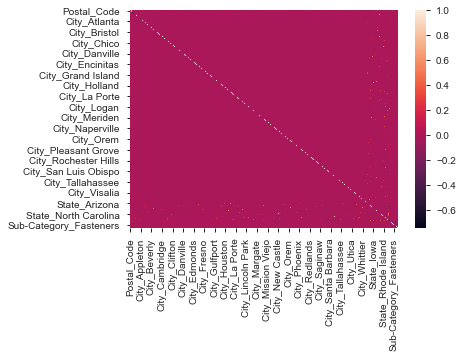

In [25]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)